<H1>MADATORY PYTHON LIBRARIES</H1>

In [1]:
%matplotlib  inline
import xarray
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import plotly.plotly as py
import plotly.graph_objs as go
plt.rcParams.update({'font.size': 15})

<h1>IN SITU MOORINGS</h1>

In Situ 'moorings' comprehends a wide range of fixed-stations such as oceanographic buoys, tide gauges, river flows etc. These platforms provides data time series of certain parameters at a specific location over time. It's platform data sources are: MO & RF

<h1>PLOTTING ON-SITE TIME SERIE</h1>

Imagine you have downloaded some <i>_TS_ (time serie)</i> dataset from In Situ moorings (see how to download files froma  certain [platform data source](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_data_source.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_category.ipynb)) like: [MO_TS_MO_ANDRATX.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/mooring/MO_TS_MO_ANDRATX.nc)

In [3]:
dataset = 'MO_TS_MO_ANDRATX.nc'

Let's have a look to its content:

In [4]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/MO_TS_MO_ANDRATX.nc


In [5]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [6]:
ds

<xarray.Dataset>
Dimensions:      (DEPTH: 1, LATITUDE: 58839, LONGITUDE: 58839, POSITION: 58839, TIME: 58839)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2011-06-02 2011-06-02T01:00:00.028800 ...
  * LATITUDE     (LATITUDE) float64 39.55 39.55 39.55 39.55 39.55 39.55 ...
  * LONGITUDE    (LONGITUDE) float64 2.385 2.385 2.385 2.385 2.385 2.385 ...
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC      (TIME) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    POSITION_QC  (POSITION) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    DEPH         (TIME, DEPTH) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    DEPH_QC      (TIME, DEPTH) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    DEPH_DM      (TIME, DEPTH) object 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' ...
    ATMP         (TIME, DEPTH) float64 1.021e+03 1.021e+03 1.02e+03 1.02e+03 ...
    ATMP_QC      (TIME, DEPTH) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ATMP_DM      (TIME,

these attributes can be accesed individually; i.e:

In [7]:
ds.variables.keys()

[u'TIME',
 u'TIME_QC',
 u'LATITUDE',
 u'LONGITUDE',
 u'POSITION_QC',
 u'DEPH',
 u'DEPH_QC',
 u'DEPH_DM',
 u'ATMP',
 u'ATMP_QC',
 u'ATMP_DM',
 u'PRES',
 u'PRES_QC',
 u'PRES_DM',
 u'SLEV',
 u'SLEV_QC',
 u'SLEV_DM',
 u'TEMP',
 u'TEMP_QC',
 u'TEMP_DM']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [8]:
ds['TEMP']

<xarray.DataArray 'TEMP' (TIME: 58839, DEPTH: 1)>
array([[ nan],
       [ nan],
       [ nan],
       ..., 
       [ nan],
       [ nan],
       [ nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2011-06-02 2011-06-02T01:00:00.028800 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      Sea temperature
    standard_name:  sea_water_temperature
    units:          degrees_C

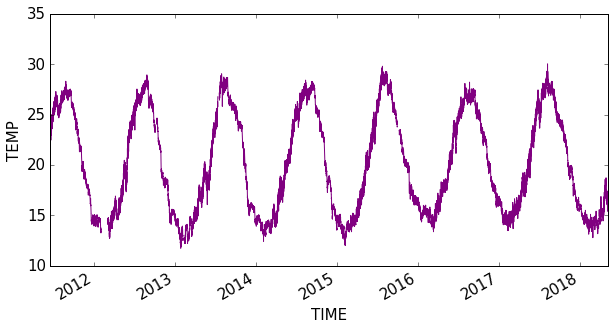

In [9]:
ds['TEMP'].plot(aspect=2, size=5, color='purple')

Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [10]:
ds['TEMP_QC']

<xarray.DataArray 'TEMP_QC' (TIME: 58839, DEPTH: 1)>
array([[ 9.],
       [ 9.],
       [ 9.],
       ..., 
       [ 9.],
       [ 9.],
       [ 9.]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2011-06-02 2011-06-02T01:00:00.028800 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      quality flag
    conventions:    OceanSITES reference table 2
    valid_min:      0
    valid_max:      9
    flag_values:    [0 1 2 3 4 5 6 7 8 9]
    flag_meanings:  no_qc_performed good_data probably_good_data bad_data_tha...

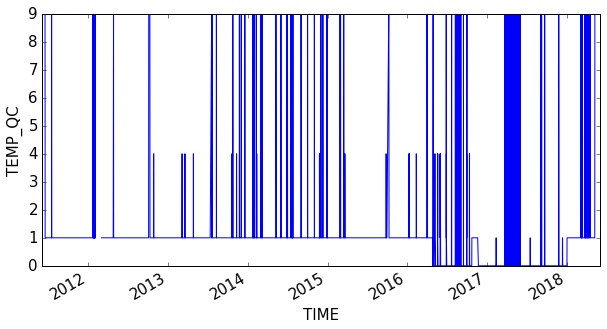

In [11]:
ds['TEMP_QC'].plot(aspect=2, size=5)

This '_QC' variable will therefore guide us when when working with the parameter data to distinguish good from bad data: 

In [12]:
pd.DataFrame(data=ds['TEMP_QC'].attrs['flag_values'], index = ds['TEMP_QC'].attrs['flag_meanings'].split(' '), columns = ['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


This way, we will be able to work with good data by selecting only those values with QC flag 1: 

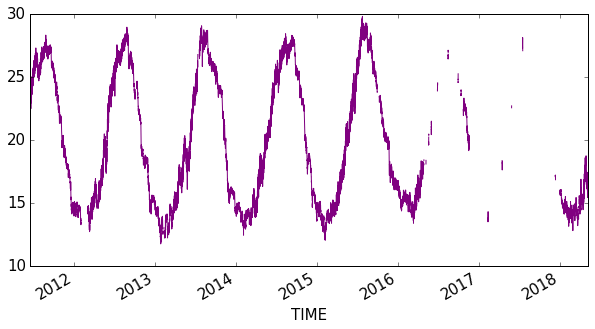

In [13]:
(ds['TEMP'].where(ds['TEMP_QC'] == 1)).plot(aspect=2, size=5, color='purple')

Setting grid and labels...

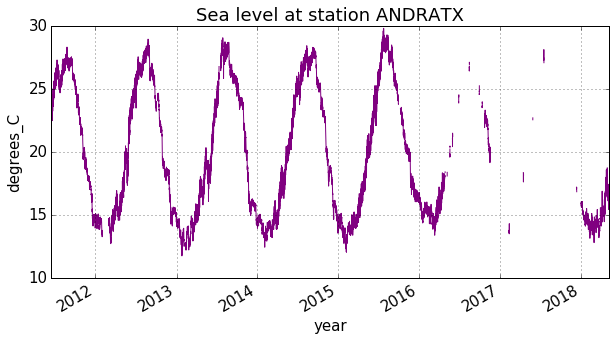

In [14]:
(ds['TEMP'].where(ds['TEMP_QC'] == 1)).plot(aspect=2, size=5, color='purple')
plt.ylabel(ds['TEMP'].units)
plt.xlabel('year')
plt.title('Sea level at station '+ ds.platform_code)
plt.grid()

<h1>PLOTTING A CERTAIN TIME SERIE RANGE</h1>

In [15]:
subset = ds.sel(TIME=slice('2013-01-01', '2013-12-31'))

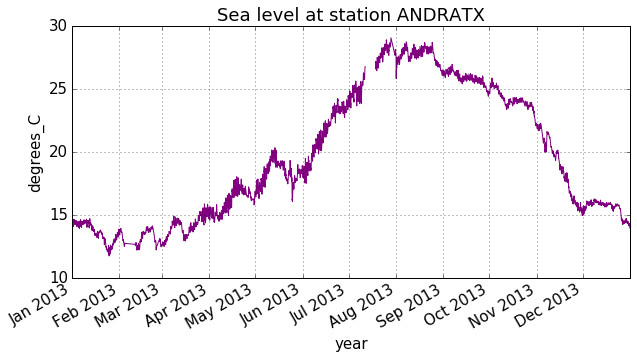

In [16]:
(subset['TEMP'].where(subset['TEMP_QC'] == 1)).plot(aspect=2, size=5, color='purple')
plt.ylabel(subset['TEMP'].units)
plt.xlabel('year')
plt.title('Sea level at station '+ ds.platform_code)
plt.grid()

<h1>PLOTTING A CERTAIN TIME SERIE RANGE MAX-MEAN-MIN</h1>

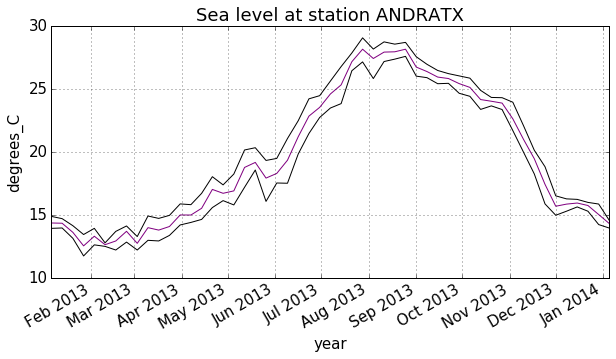

In [43]:
#(subset['TEMP'].where(subset['TEMP_QC'] == 1)).plot(aspect=2, size=5, color='grey')
(subset['TEMP'].where(subset['TEMP_QC'] == 1)).resample(freq='W', how='mean', dim='TIME').plot(color='purple', aspect=2, size=5,)
(subset['TEMP'].where(subset['TEMP_QC'] == 1)).resample(freq='W', how='max', dim='TIME').plot(color='black')
(subset['TEMP'].where(subset['TEMP_QC'] == 1)).resample(freq='W', how='min', dim='TIME').plot(color='black')
plt.ylabel(subset2['TEMP'].units)
plt.xlabel('year')
plt.title('Sea level at station '+ ds2.platform_code)
plt.grid()

<h1>INTERACTIVE PLOTS</h1>

In [293]:
unix = [int(str(element)[:10]) for element in subset['TIME'].values.tolist()]

In [294]:
date_times = [datetime.datetime.fromtimestamp(element) for element in unix]

In [298]:
data = [go.Scatter(x=date_times, y=subset['TEMP'].values.tolist())]
layout = go.Layout(xaxis = dict(range = [unix]))
py.iplot(data, layout=layout)